#  In Depth: Principal Component Analysis

Up until now, we have been looking in depth at supervised learning estimators: those estimators that predict labels based on labeled training data.
Here we begin looking at several unsupervised estimators, which can highlight interesting aspects of the data without reference to any known labels.

In this section, we explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA).
PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.
After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.

We begin with the standard imports:

In [76]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Introducing Principal Component Analysis

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data, which we saw briefly in [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb).
Its behavior is easiest to visualize by looking at a two-dimensional dataset.
Consider the following 200 points:

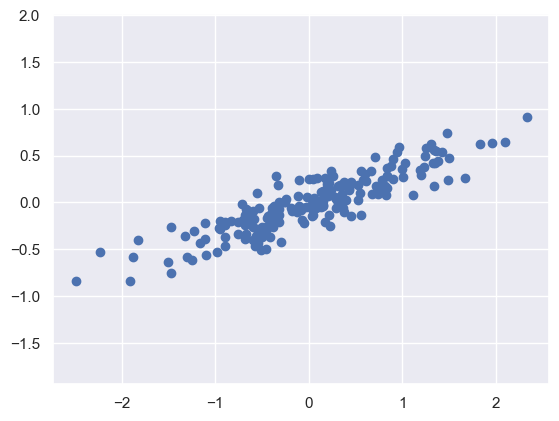

In [77]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables.
This is reminiscent of the linear regression data we explored in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb), but the problem setting here is slightly different: rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.
Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [79]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [80]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

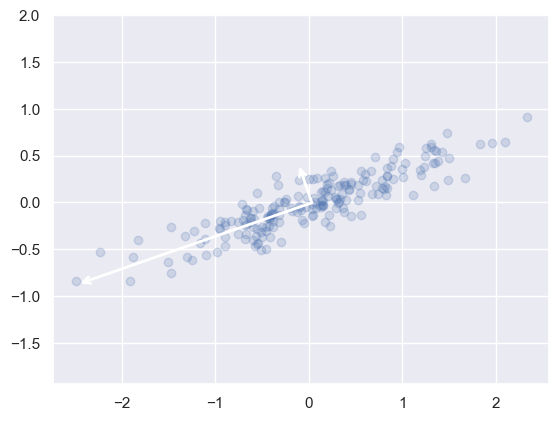

In [81]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal components" of the data.

If we plot these principal components beside the original data, we see the plots shown here:

![](figures/05.09-PCA-rotation.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Principal-Components-Rotation)

This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [82]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

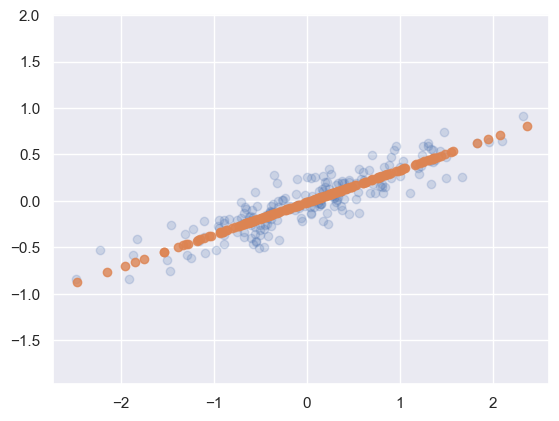

In [83]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

### PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.
To see this, let's take a quick look at the application of PCA to the digits data we saw in [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb).

We start by loading the data:

In [84]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [85]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

/var/folders/_m/km0zz50n2jx4ybhfs6ybm9m40000gn/T/ipykernel_56997/1247186860.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Blues_r', 10))


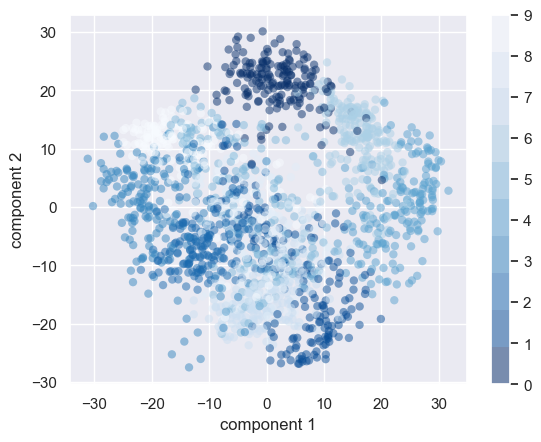

In [86]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            # cmap=plt.cm.get_cmap('spectral', 10))  # HN: No spectral color map
            cmap=plt.cm.get_cmap('Blues_r', 10))

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

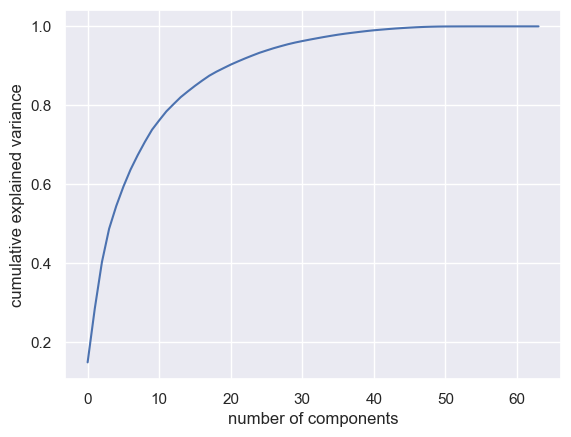

In [87]:
pca = PCA().fit(digits.data)  # HN: If set n_components=NONE, will generate ALL components 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.
The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data.
First we will plot several of the input noise-free data:

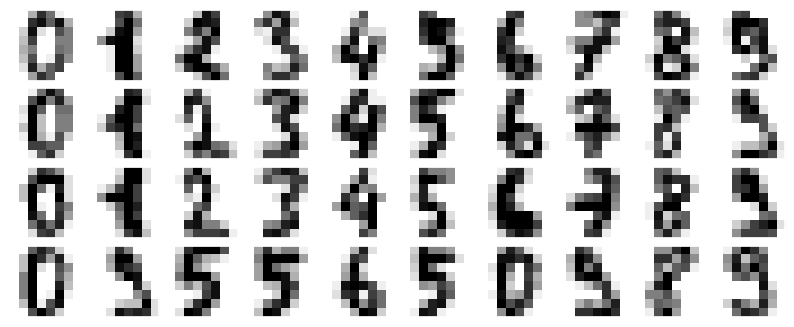

In [88]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it:

Experiment 1: 

(1) Modify the std of generated normal random digits as 2,4,8, observe the generated digits.

(2) Modify the required accmulative variance-ratio as 0.5, 0.7, 0.9, observe the needed components

(3) Explain the observations.

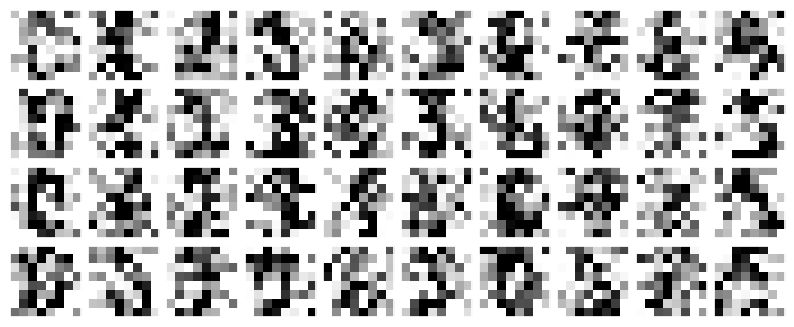

In [89]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 8)  # HN: you can modify the std of normal random number as 2,4,8
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels.
Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [90]:
pca = PCA(0.90).fit(noisy)   # HN: You can modify the ratio as 0.5, 0.7, 0.9 to see how many components be needed
pca.n_components_

54

Here 50% of the variance amounts to 12 principal components.
Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

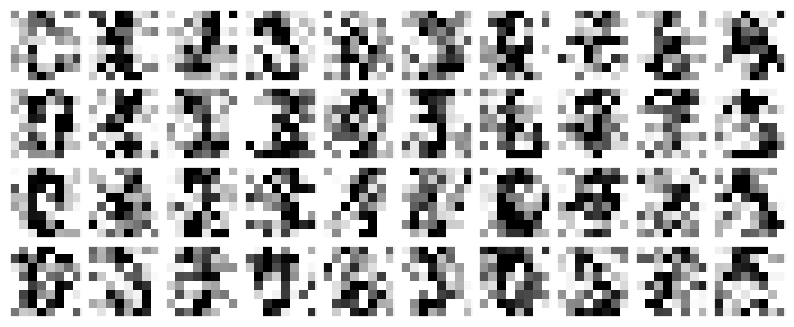

In [91]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

## Example: Eigenfaces

Earlier we explored an example of using a PCA projection as a feature selector for facial recognition with a support vector machine (see [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)).
Here we will take a look back and explore a bit more of what went into that.
Recall that we were using the Labeled Faces in the Wild dataset made available through Scikit-Learn:

Experiment 2:

(1) Load face data, observe the data information of the faces with 

(2) PCA with 500，观察累积解释方差图，计算n_pcs=50,150,300等处的累积解释方差比。

(3) 对比不同的n_pcs=50,150,300时，重建图像的效果差异，简要分析。


In [92]:
# Note: The faces data has been downloaded. 
# Decompress them to C:\Users\Administrator\scikit_learn_data\lfw_home

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60, resize=0.7) # image size: resize = 0.5, 0.7
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 87, 65)


Let's take a look at the principal axes that span this dataset.
Because this is a large dataset, we will use ``RandomizedPCA``—it contains a randomized method to approximate the first $N$ principal components much more quickly than the standard ``PCA`` estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000).
We will take a look at the first 150 components:

In [93]:
# from sklearn.decomposition import RandomizedPCA # HN obsolete
from sklearn.decomposition import PCA

#pca = RandomizedPCA(150)  # HN：obsolete, modified RandomizedPCA() to PCA().
pca = PCA(500, svd_solver='randomized')  # HN：modify to 300,500, to see the cumulative variance plot

pca.fit(faces.data)

PCA(n_components=500, svd_solver='randomized')

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors,"
so these types of images are often called "eigenfaces").
As you can see in this figure, they are as creepy as they sound:

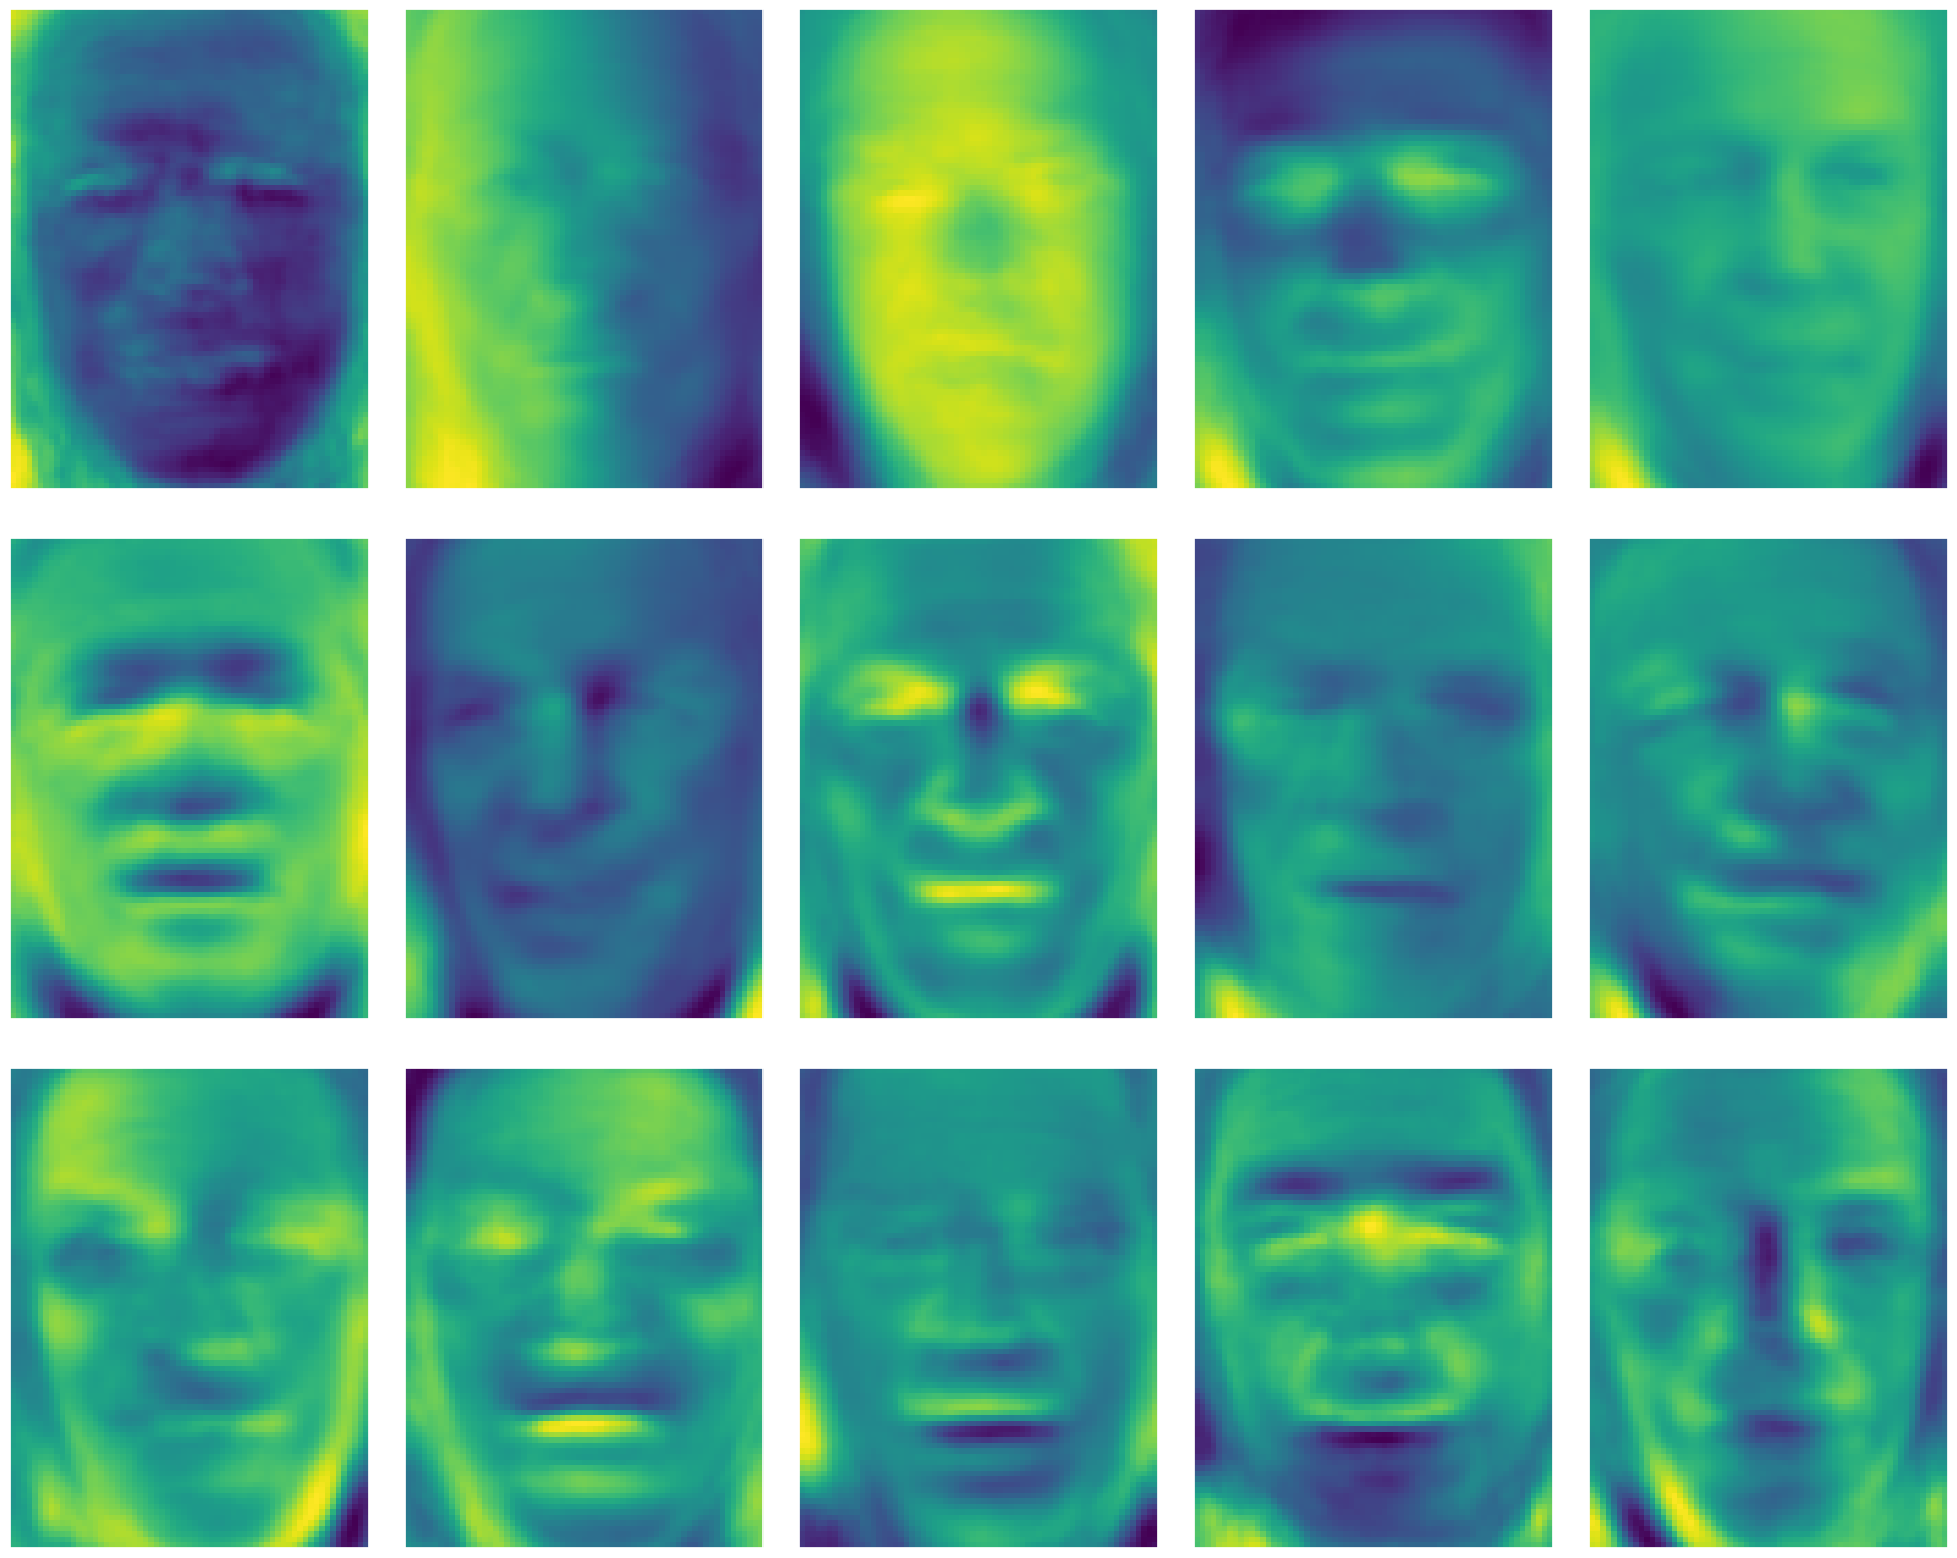

In [94]:
# plot eigenface.
fig, axes = plt.subplots(3, 5, figsize=(25, 20),   # original: 3, 8, (10, 2.5)
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    #ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')  #cmap='bone'
    ax.imshow(pca.components_[i].reshape(faces.images.shape[1],faces.images.shape[2]), cmap='viridis')  # HN: modified
        

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips.
Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

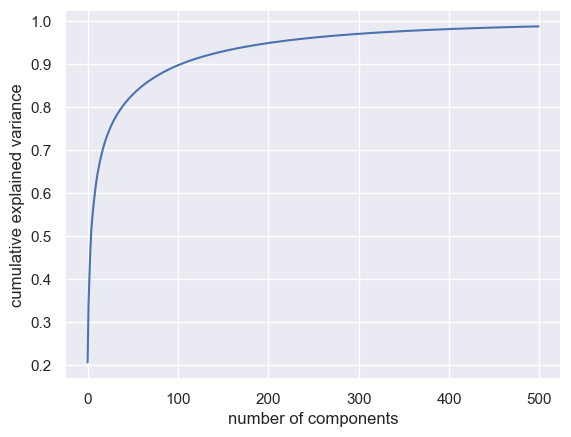

In [95]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [111]:
# Compute the explained variance ration by partial principle components
n_pcs=300
sum_var=sum(pca.explained_variance_ratio_[:n_pcs])    # HN: Compute other sum of variance ratios: 50,100,150,300
print("The explained varieance by %d first PCs : %.3f\n" % (n_pcs,sum_var))


The explained varieance by 300 first PCs : 0.971



We see that these 100 components account for just over 90% of the variance.
That would lead us to believe that using these 100 components, we would recover most of the essential characteristics of the data.
To make this more concrete, we can compare the input images with the images reconstructed from different  components:

In [97]:
# Compute the components and projected faces 
n_pcs=50
pca = PCA(n_pcs,svd_solver='randomized').fit(faces.data)  # HN: used this call.  with n_pcs = 50, 150, 300

components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

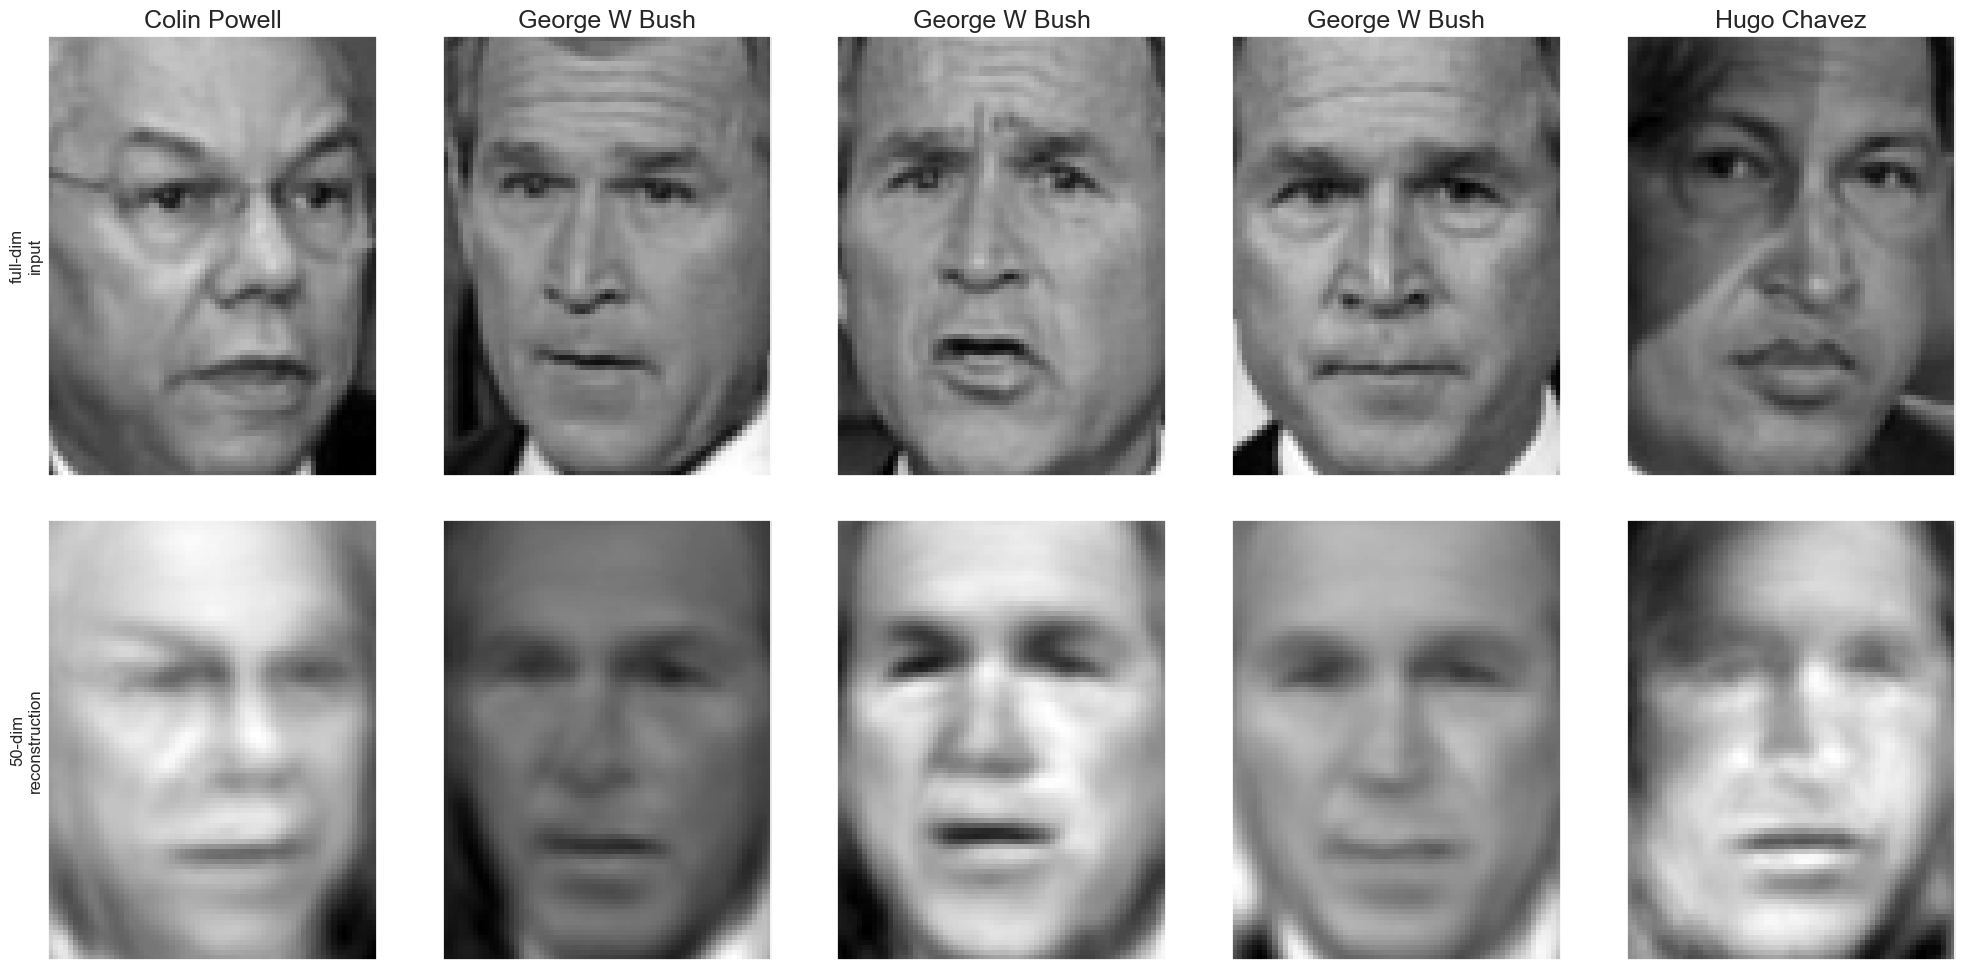

In [98]:
# Plot the results
fig, ax = plt.subplots(2, 5, figsize=(25, 12), # original: 2,10, (10, 2.5)
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(5):  # original: 10
    ax[0, i].imshow(faces.data[i].reshape(faces.images.shape[1],faces.images.shape[2]), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(faces.images.shape[1],faces.images.shape[2]), cmap='binary_r')
    ax[0, i].set_title(faces.target_names[faces.target[i]],fontsize=18)

ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('%d-dim\nreconstruction' % n_pcs);


The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features.
This visualization makes clear why the PCA feature selection used in [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb) was so successful: although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image.
What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.

In [99]:
# Compute the components and projected faces

n_pcs=150
pca = PCA(n_pcs,svd_solver='randomized').fit(faces.data)  #HN: for contrast, use repeated codes

components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

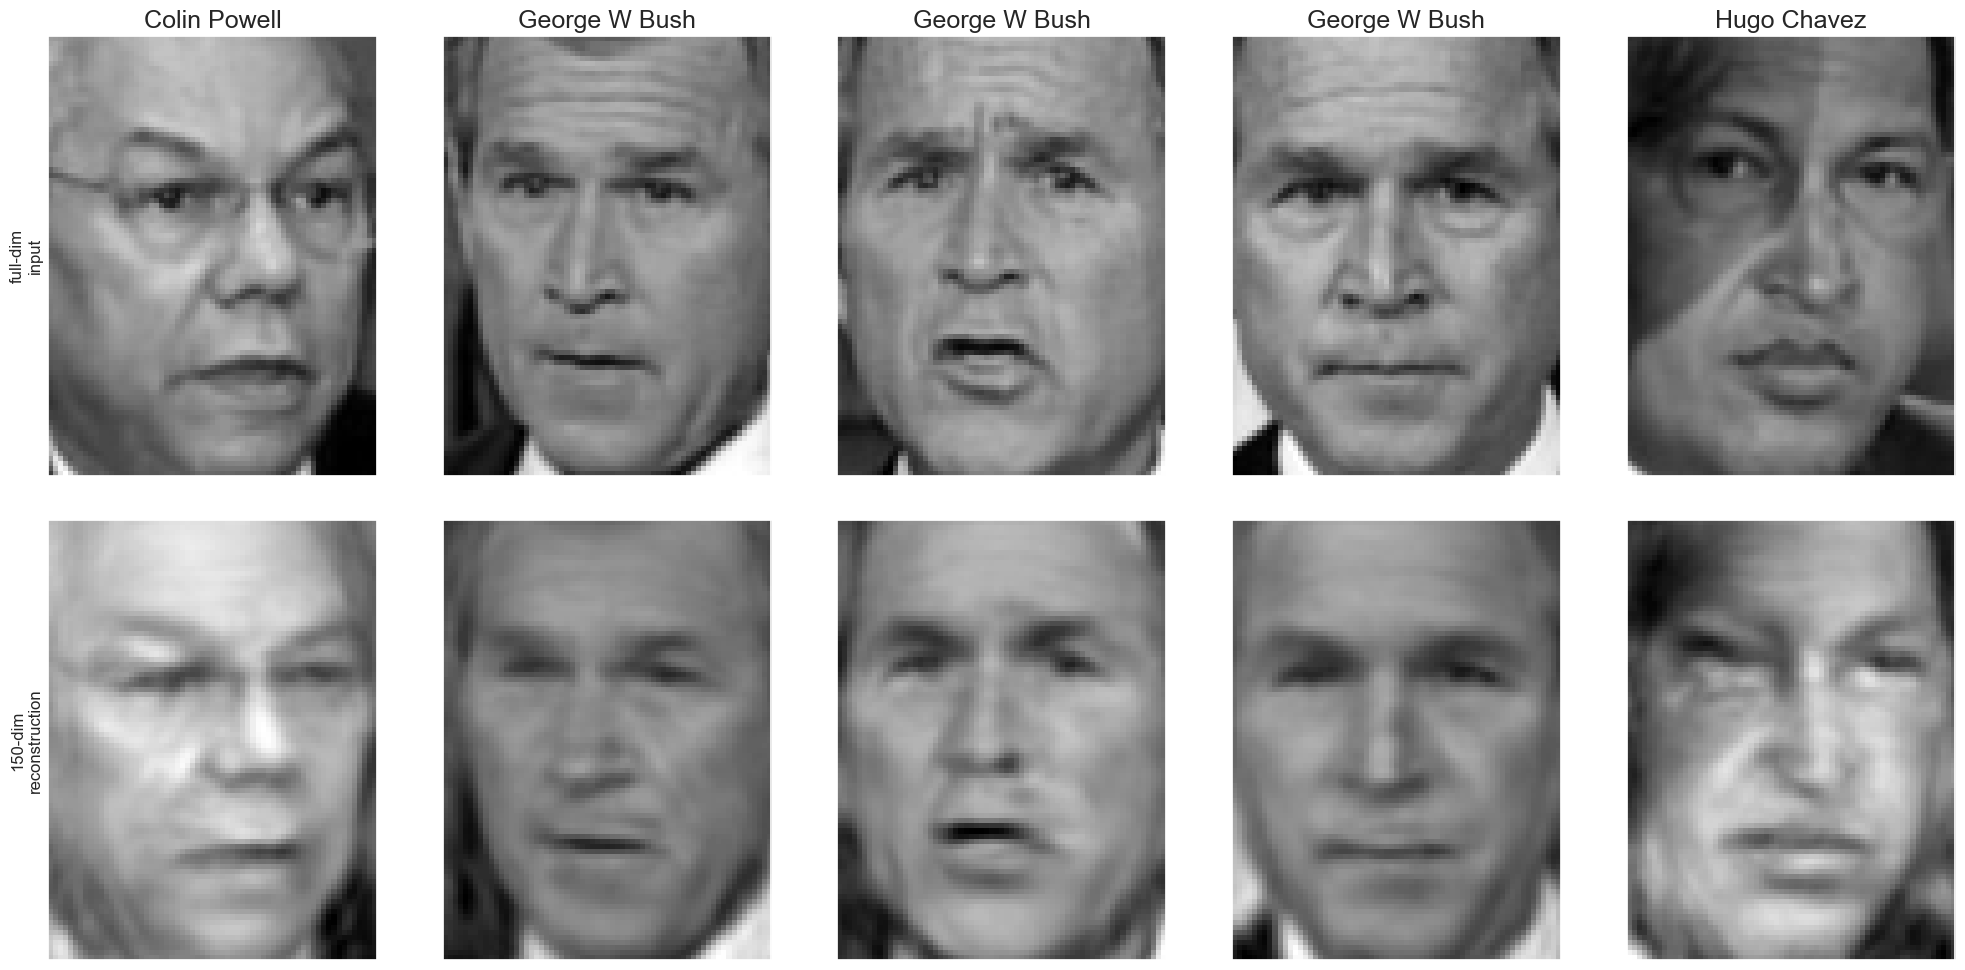

In [100]:
# Plot the results
fig, ax = plt.subplots(2, 5, figsize=(25, 12), # original: 2,10, (10, 2.5)
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(5):  # original: 10
    ax[0, i].imshow(faces.data[i].reshape(faces.images.shape[1],faces.images.shape[2]), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(faces.images.shape[1],faces.images.shape[2]), cmap='binary_r')
    ax[0, i].set_title(faces.target_names[faces.target[i]],fontsize=18)
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('%d-dim\nreconstruction' % n_pcs);

In [101]:
# Compute the components and projected faces
n_pcs=300
pca = PCA(n_pcs,svd_solver='randomized').fit(faces.data) #HN: for contrast, use repeated codes

components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

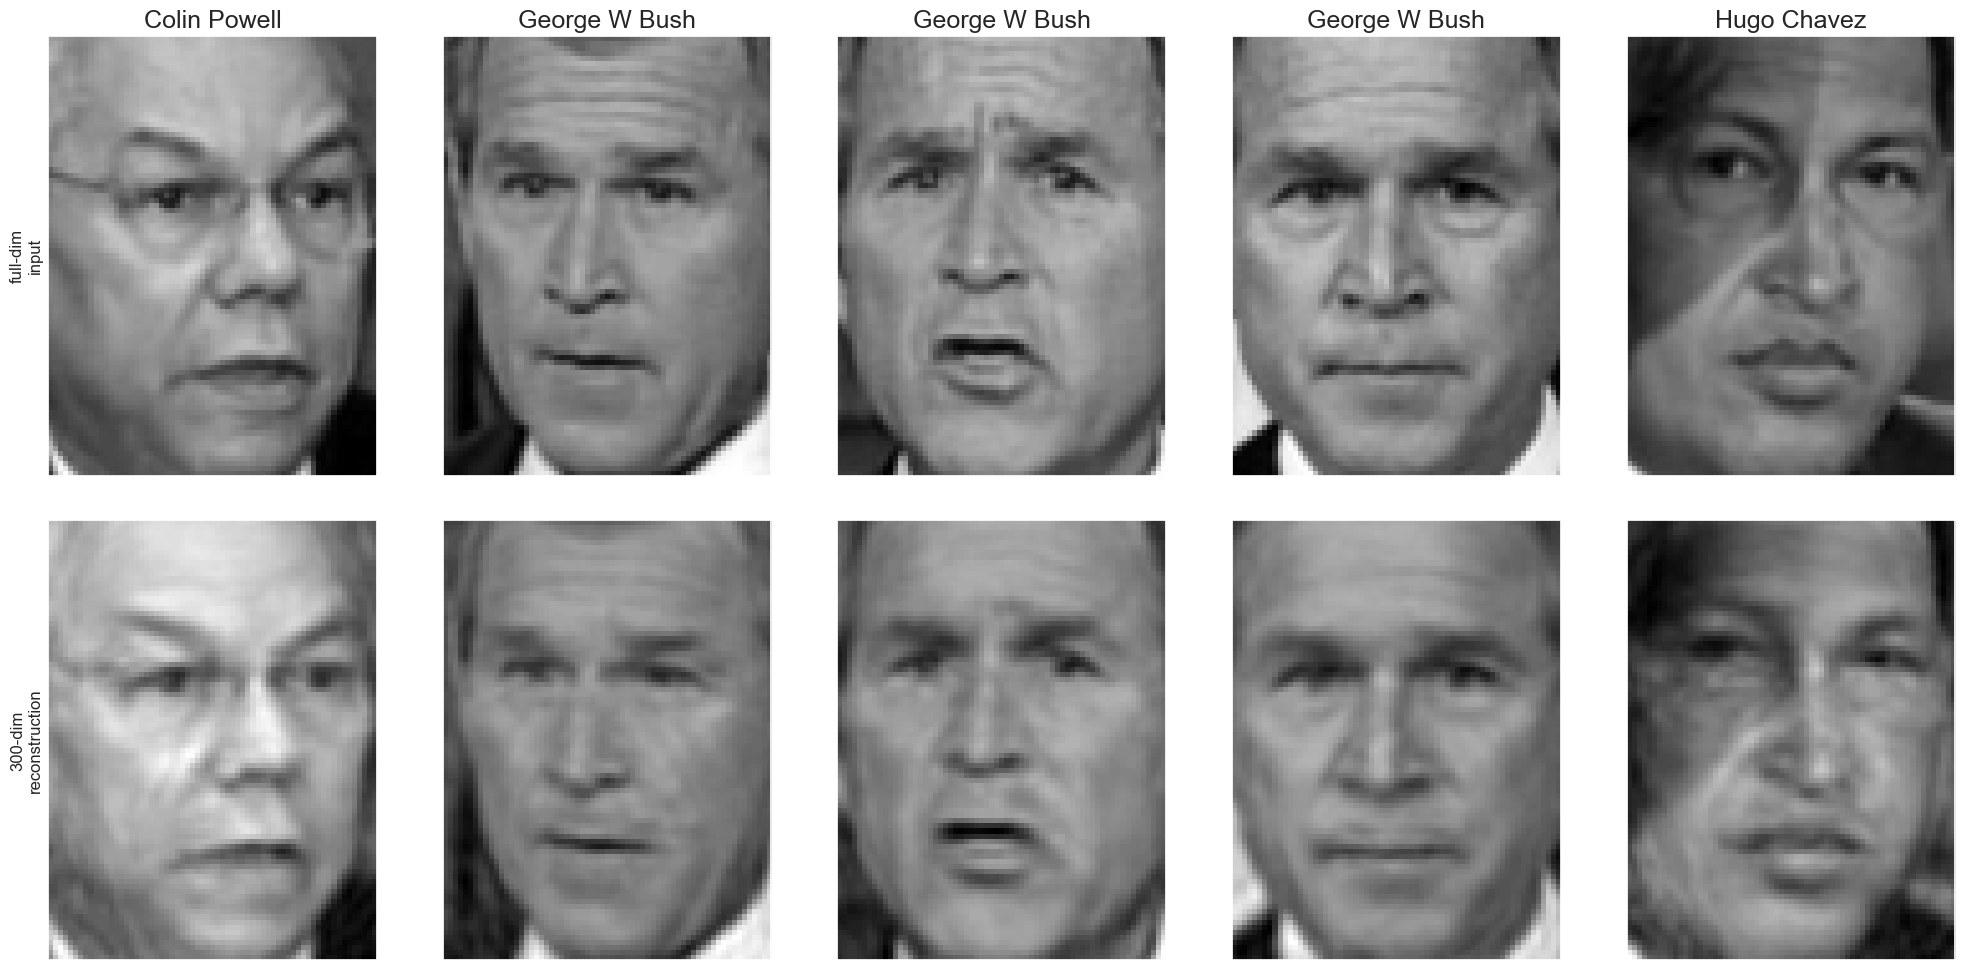

In [102]:
# Plot the results
fig, ax = plt.subplots(2, 5, figsize=(25, 12), # original: 2,10, (10, 2.5)
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(5):  # original: 10
    ax[0, i].imshow(faces.data[i].reshape(faces.images.shape[1],faces.images.shape[2]), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(faces.images.shape[1],faces.images.shape[2]), cmap='binary_r')
    ax[0, i].set_title(faces.target_names[faces.target[i]],fontsize=18)
        
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('%d-dim\nreconstruction' % n_pcs);

Experiment 3: 

Now, we can test if the PCA can enhance the classification performance.

(1) Control the number of speicific person's faces to 40

(2) Use 1-NN to calssify the original faces.

(3) Use different components (30，50, 100, 150) PCA, and use the dim-reduced face data to classify.

(4) Contrast the classification rates between two tests.

In [103]:
# Data preparation. Keep this part unchanged.

mask = np.zeros(faces.target.shape, dtype=np.bool)
for target in np.unique(digits.target):
    mask[np.where(faces.target == target)[0][:40]] = 1  # Control the number of speicific person's faces to 40
    
X_people = faces.data[mask]
y_people = faces.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

/var/folders/_m/km0zz50n2jx4ybhfs6ybm9m40000gn/T/ipykernel_56997/1080821994.py:3: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  mask = np.zeros(faces.target.shape, dtype=np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

# build a KNeighborsClassifier with using one neighbor: classify with the original data:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("X_train.shape: {}".format(X_train.shape))
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

X_train.shape: (240, 5655)
Test set score of 1-nn: 0.39


In [ ]:
# Now, make n_components PCA, and reconstruct (transform) the faces with reduced dim (equal to n_components)
# whiten=True 
pca = PCA(n_components=30, whiten=True, random_state=0).fit(X_train)  # HN: Try n_components=30，50, 100, 150
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (240, 30)


In [ ]:
# build a KNeighborsClassifier with using one neighbor; classify with the reduced-dim PCA data:

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.50


## Principal Component Analysis Summary

In this section we have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data.
Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines.
Given any high-dimensional dataset, I tend to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio).
Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

PCA's main weakness is that it tends to be highly affected by outliers in the data.
For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.